<a href="https://colab.research.google.com/github/ravelate/ai-flask/blob/main/image%20classification%20using%20ANN/neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import zipfile

local_zip = '/tmp/segmentedleaf.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [51]:
base_dir = '/tmp/segmentedleaf'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'lidahbuaya')
train_dogs_dir = os.path.join(train_dir, 'pandan')

validation_cats_dir = os.path.join(validation_dir, 'lidahbuaya')
validation_dogs_dir = os.path.join(validation_dir, 'pandan')

In [52]:
# Cek penamaan image yang ada di folder train_cats_dir dan train_dogs_dir
print(os.listdir(train_cats_dir)[:10])
print(os.listdir(train_dogs_dir)[:10])

['019.png', '059.png', '062.png', '075.png', '074.png', '009.png', '015.png', '053.png', '022.png', '008.png']
['209.png', '162.png', '163.png', '186.png', '188.png', '166.png', '159.png', '193.png', '164.png', '194.png']


In [53]:
# Cek jumlah data train dan data validation
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total training cat images: 75
total training dog images: 75
total validation cat images: 75
total validation dog images: 75


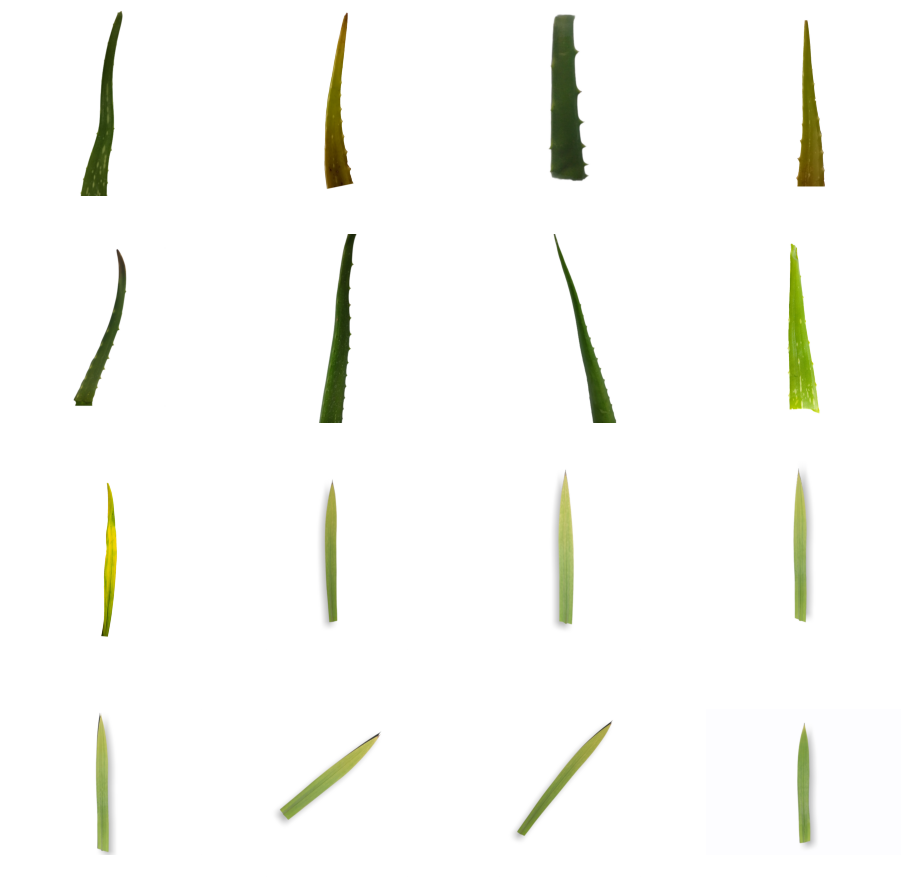

In [54]:
# Tampilkan 8 image per kelas dengan ukuran 4x4 

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in os.listdir(train_cats_dir)[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in os.listdir(train_dogs_dir)[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [62]:
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".png" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [63]:
# Gather data validation
val_data = []
val_label = []
for r, d, f in os.walk(validation_dir):
    for file in f:
        if ".png" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

<h3>Data Preprocessing</h3>

In [64]:
# Tampilkan shape dari data train dan data validation
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data =  (150, 150, 150, 3)
Train Label =  (150,)
Validation Data =  (150, 150, 150, 3)
Validation Label =  (150,)


In [65]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [255 255 255]
Data setelah di-normalisasi  [1. 1. 1.]


In [67]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label)

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)

print("Label setelah di-encoder ", y_train)

Label sebelum di-encoder  ['pandan' 'pandan' 'pandan' 'pandan' 'pandan' 'pandan' 'pandan' 'pandan'
 'pandan' 'pandan' 'pandan' 'pandan' 'pandan' 'pandan' 'pandan' 'pandan'
 'pandan' 'pandan' 'pandan' 'pandan' 'pandan' 'pandan' 'pandan' 'pandan'
 'pandan' 'pandan' 'pandan' 'pandan' 'pandan' 'pandan' 'pandan' 'pandan'
 'pandan' 'pandan' 'pandan' 'pandan' 'pandan' 'pandan' 'pandan' 'pandan'
 'pandan' 'pandan' 'pandan' 'pandan' 'pandan' 'pandan' 'pandan' 'pandan'
 'pandan' 'pandan' 'pandan' 'pandan' 'pandan' 'pandan' 'pandan' 'pandan'
 'pandan' 'pandan' 'pandan' 'pandan' 'pandan' 'pandan' 'pandan' 'pandan'
 'pandan' 'pandan' 'pandan' 'pandan' 'pandan' 'pandan' 'pandan' 'pandan'
 'pandan' 'pandan' 'pandan' 'lidahbuaya' 'lidahbuaya' 'lidahbuaya'
 'lidahbuaya' 'lidahbuaya' 'lidahbuaya' 'lidahbuaya' 'lidahbuaya'
 'lidahbuaya' 'lidahbuaya' 'lidahbuaya' 'lidahbuaya' 'lidahbuaya'
 'lidahbuaya' 'lidahbuaya' 'lidahbuaya' 'lidahbuaya' 'lidahbuaya'
 'lidahbuaya' 'lidahbuaya' 'lidahbuaya' 'lidahbuaya'

<h3>Definisikan Model</h3>

In [68]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [69]:
# Buat model dengan 1 input layer, 1 hidden layer, dan 1 output layer
img_input = layers.Input(shape=(150, 150, 3)) # layer input
x = layers.Flatten()(img_input) # ubah dari matriks 150x150x3 menjadi vektor
x = layers.Dense(128, activation='relu')(x) # hidden layer 1 dengan 128 neuron
output = layers.Dense(1, activation='sigmoid')(x) # output layer dengan 1 neuron (binary)

# Definisikan modelnya
model = Model(img_input, output)

In [70]:
# Tampilkan model summary
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 flatten_1 (Flatten)         (None, 67500)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               8640128   
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 8,640,257
Trainable params: 8,640,257
Non-trainable params: 0
_________________________________________________________________


In [71]:
from tensorflow.keras.optimizers import Adam

# Compile model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [72]:
H = model.fit(x_train, y_train, batch_size=20, epochs=50, validation_data=(x_val, y_val))

Epoch 1/50
8/8 [==============================] - 1s 74ms/step - loss: 25.3342 - acc: 0.4867 - val_loss: 13.3432 - val_acc: 0.5000
Epoch 2/50
8/8 [==============================] - 0s 60ms/step - loss: 9.2218 - acc: 0.4667 - val_loss: 4.6292 - val_acc: 0.4467
Epoch 3/50
8/8 [==============================] - 0s 55ms/step - loss: 2.3727 - acc: 0.6267 - val_loss: 9.9306 - val_acc: 0.5000
Epoch 4/50
8/8 [==============================] - 0s 56ms/step - loss: 2.2139 - acc: 0.6933 - val_loss: 11.1545 - val_acc: 0.5000
Epoch 5/50
8/8 [==============================] - 0s 56ms/step - loss: 2.2834 - acc: 0.7600 - val_loss: 4.0511 - val_acc: 0.4733
Epoch 6/50
8/8 [==============================] - 0s 57ms/step - loss: 0.9432 - acc: 0.8200 - val_loss: 4.3213 - val_acc: 0.4200
Epoch 7/50
8/8 [==============================] - 0s 60ms/step - loss: 1.9618 - acc: 0.7133 - val_loss: 14.7150 - val_acc: 0.5000
Epoch 8/50
8/8 [==============================] - 0s 58ms/step - loss: 3.3045 - acc: 0.6800 -

<h3>Evaluasi Model</h3>

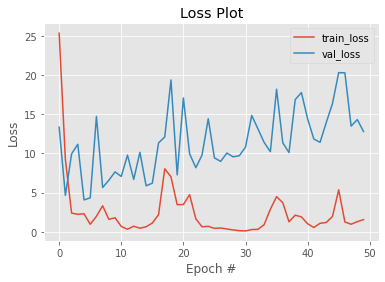

In [73]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

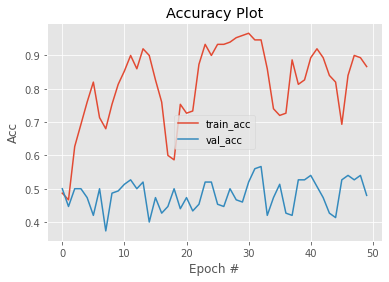

In [74]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 50), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [75]:
from sklearn.metrics import classification_report

pred = model.predict(x_val)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_val, labels))

              precision    recall  f1-score   support

           0       0.49      0.67      0.56        75
           1       0.47      0.29      0.36        75

    accuracy                           0.48       150
   macro avg       0.48      0.48      0.46       150
weighted avg       0.48      0.48      0.46       150



In [90]:
queryPath = '/tmp/segmentedleaf/train/lidahbuaya/023.png'
query = cv2.imread(queryPath)
output = query.copy()
query = cv2.resize(query, (150, 150))
q = []
q.append(query)
q = np.array(q, dtype='float') / 255.0

q_pred = model.predict(q)
print(q_pred)

[[1.3549137e-11]]


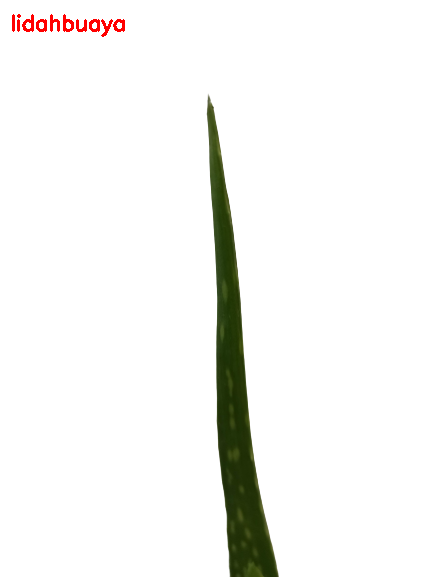

In [91]:
from google.colab.patches import cv2_imshow
if q_pred<=0.5 :
    target = "lidahbuaya"
else :
    target = "Pandan"
text = "{}".format(target)
cv2.putText(output, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
 
# menampilkan output image
cv2_imshow(output)